# **Aplicando o Support Vector Machines (SVM)**
- **Na Base de Dados do Titanic**

### Bibliotecas

In [20]:
# Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

### Base de Dados

In [2]:
# Dados
df = pd.read_csv('../data/train.csv')
df

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,29.0,1,0,7.2500,2
1,1,1,1,0,56.0,1,0,71.2833,0
2,2,1,3,0,35.0,0,0,7.9250,2
3,3,1,1,0,52.0,1,0,53.1000,2
4,4,0,3,1,52.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,886,0,2,1,37.0,0,0,13.0000,2
887,887,1,1,0,24.0,0,0,30.0000,2
888,888,0,3,0,28.0,1,2,23.4500,2
889,889,1,1,1,35.0,0,0,30.0000,0


In [3]:
# eliminado a coluna Unnamed: 0
df = df.drop(columns='Unnamed: 0')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,29.0,1,0,7.2500,2
1,1,1,0,56.0,1,0,71.2833,0
2,1,3,0,35.0,0,0,7.9250,2
3,1,1,0,52.0,1,0,53.1000,2
4,0,3,1,52.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,37.0,0,0,13.0000,2
887,1,1,0,24.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,35.0,0,0,30.0000,0


### Separando as variáveis de classificação e previsores

In [4]:
# Criando as variáveis de classificação e previsores
X = df.iloc[:,1:8].values
y = df.iloc[:, 0].values
X

array([[ 3.    ,  1.    , 29.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 56.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 35.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 3.    ,  0.    , 28.    , ...,  2.    , 23.45  ,  2.    ],
       [ 1.    ,  1.    , 35.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 46.    , ...,  0.    ,  7.75  ,  1.    ]])

### Normalizando os Dados

In [5]:
# Normalização de dados
normalizar = StandardScaler()
X = normalizar.fit_transform(X.astype(float))
X

array([[ 0.82737724,  0.73769513, -0.62995546, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.79880277, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.31245363, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354, -0.68287243, ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.31245363, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.26963305, ..., -0.47367361,
        -0.49237783, -0.67817453]])

### Modelo de Machine Learning

In [6]:
# Treinado o modelo
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)
X_treinamento

array([[-1.56610693,  0.73769513,  1.06338762, ..., -0.47367361,
        -0.03431369,  0.58595414],
       [ 0.82737724,  0.73769513, -0.3653706 , ..., -0.47367361,
        -0.50647211,  0.58595414],
       [-0.36936484, -1.35557354, -0.47120455, ...,  2.00893337,
        -0.35646869,  0.58595414],
       ...,
       [ 0.82737724,  0.73769513,  1.01047065, ..., -0.47367361,
        -0.36435545,  0.58595414],
       [-1.56610693, -1.35557354, -1.21204215, ...,  2.00893337,
         1.76774081,  0.58595414],
       [-1.56610693,  0.73769513, -0.7357894 , ...,  0.76762988,
         0.90773798,  0.58595414]])

In [7]:
#  Modelo SVM
clasificar = SVC(kernel='rbf')
clasificar.fit(X_treinamento, y_treinamento)

SVC()

In [8]:
# Previsões utilizando os registros de teste
svmPredicao = clasificar.predict(X_teste)
# visualizando a taxa de acerto
svmTaxaAcerto = accuracy_score(y_teste, svmPredicao)
svmTaxaAcerto

0.8251121076233184

In [9]:
#matriz de confusão
confusao = confusion_matrix(y_teste, svmPredicao)
confusao

array([[119,  15],
       [ 24,  65]], dtype=int64)

<Axes: >

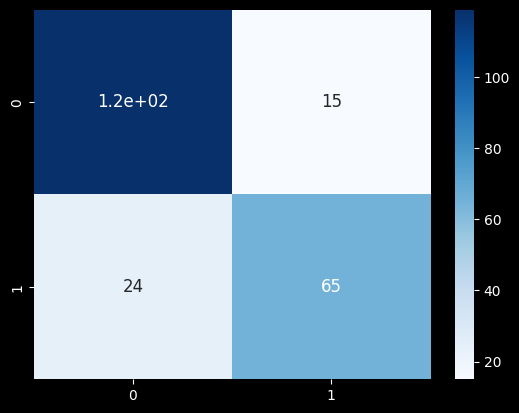

In [10]:
sns.heatmap(confusao, annot=True, annot_kws={"size":12}, cmap=plt.cm.Blues)

## Base de Teste

In [11]:
# dado
dfTest = pd.read_csv('../data/test.csv')
dfTest

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Tratando valores Nulos nos dados de teste

In [12]:
# Eliminado a coluna Cabin
dfTest = dfTest.drop(columns='Cabin')
dfTest.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [13]:
# Agrupando o fare por gênero e classe
fare = dfTest.groupby(['Pclass', 'Sex'])['Fare'].transform('mean')
fare

0       11.826350
1       13.735129
2       20.184654
3       11.826350
4       13.735129
          ...    
413     11.826350
414    115.591168
415     11.826350
416     11.826350
417     11.826350
Name: Fare, Length: 418, dtype: float64

In [14]:
# Substituído o valor NAs
dfTest['Fare'] = dfTest['Fare'].fillna(fare)
dfTest.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [15]:
dfTest.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [16]:
# Agrupando as idades por gênero e classe
idade_test = dfTest.groupby(['Pclass', 'Sex'])['Age'].transform('mean')
idade_test = round(idade_test, 1)
idade_test

0      24.5
1      23.1
2      30.9
3      24.5
4      23.1
       ... 
413    24.5
414    41.3
415    24.5
416    24.5
417    24.5
Name: Age, Length: 418, dtype: float64

In [17]:
# Substituído o valor NAs
dfTest['Age'] = dfTest['Age'].fillna(idade_test)
dfTest.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [18]:
dfSurvivor = dfTest['PassengerId']
dfSurvivor = pd.DataFrame(dfSurvivor)
dfSurvivor

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [19]:
# Eliminado as colunas PassengerId, Ticket e name
df_test = dfTest.drop(['PassengerId', 'Ticket', 'Name'], axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [21]:
# Transformação dos atributos categóricos em atributos numéricos, passando o índice de cada coluna categórica
df_teste = df_test.iloc[:, 0:7].values

labelencoder1 = LabelEncoder()
df_teste[:,1] = labelencoder1.fit_transform(df_teste[:,1])

labelencoder2 = LabelEncoder()
df_teste[:,6] = labelencoder2.fit_transform(df_teste[:,6])

In [24]:
survivor = clasificar.predict(df_teste)
dfSurvivor['Survived'] = survivor
dfSurvivor['Survived'].value_counts()

Survived
0    418
Name: count, dtype: int64